# Breast Cancer Histology Slides

These are subsections of H&E stained whole slide images ftom Sunnybrook hospital. They were taken at 20x magnification, and are size of around 512x512

The nucleus of each cell is labelled as one of: 
* Lymphocyte 
* Normal Epithelial
* Malignant Epithelial

Regions where the pathologist was not sure of the true label are not marked.

In [2]:
import os
import numpy as np
import pandas as pd
import glob
import scipy.misc
import matplotlib.pyplot as plt 
from matplotlib.pyplot import imshow
from PIL import Image
from bs4 import BeautifulSoup
from collections import Counter

% matplotlib inline

## Whole images
* Look at a few random images

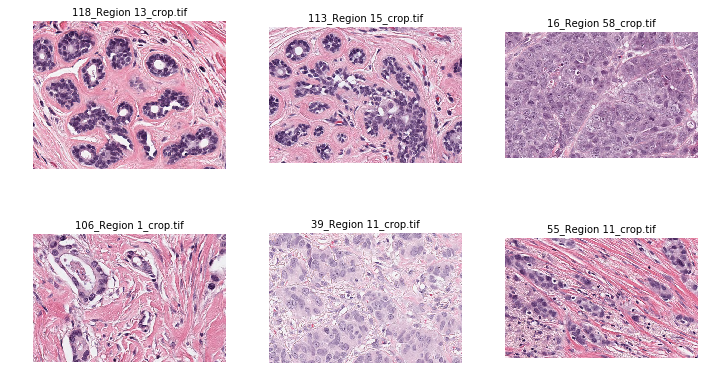

In [37]:
data_loc ='/Users/rb/Documents/waterloo/projects/cancer_hist/ExtractedNucleiROIs'
all_files=glob.glob(os.path.join(data_loc, '*'))
all_images = [loc for loc in all_files if loc.rsplit('.', 1)[-2][-4:] == 'crop']
image_locs = np.random.choice(all_images, 6)


f = plt.figure(figsize=(10,6)) 
for i in range(len(image_locs)):
    sp = f.add_subplot(2, len(image_locs)//2, i+1)
    sp.axis('Off')
    sp.set_title(image_locs[i].rsplit('/', 1)[-1], fontsize=10)
    image = np.asarray(Image.open(image_locs[i]))
    plt.tight_layout()
    plt.imshow(image)

## Nucleus location
* The nucleus is only tagged for cells where the pathologist was able to identify the class of the nucleus
* We can look at some of the annotations below:

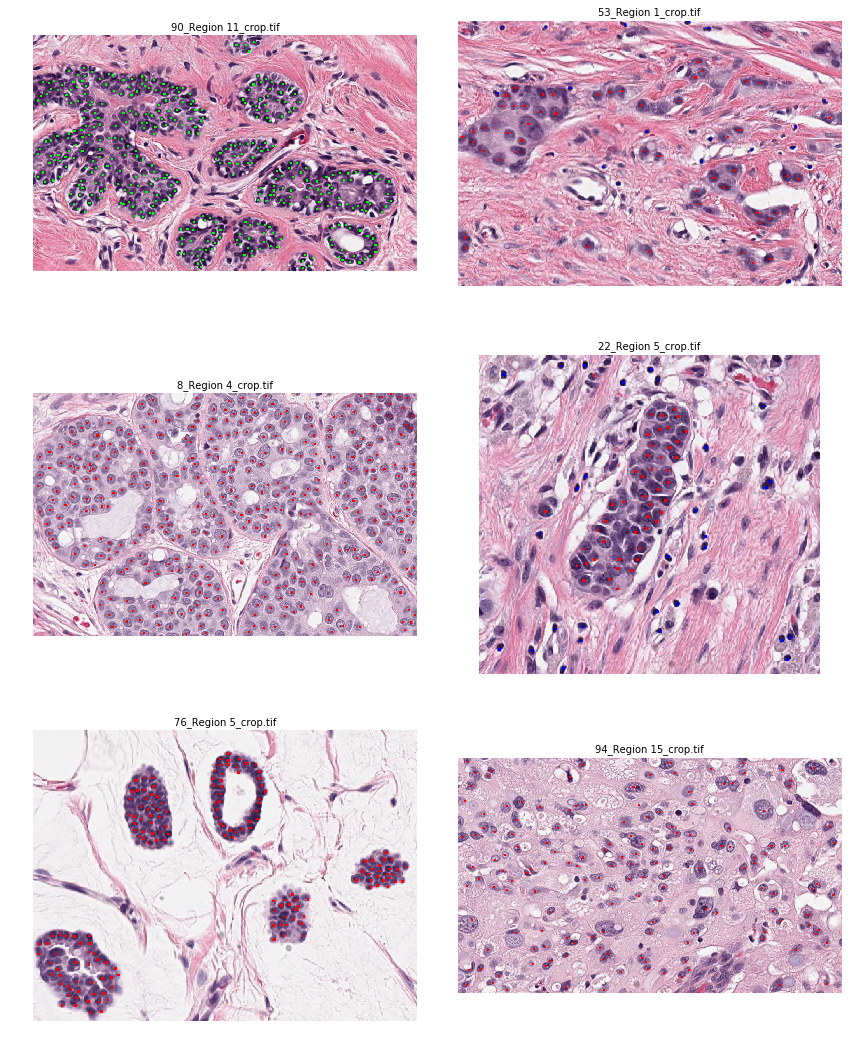

In [45]:
import sys
sys.path.insert(0, '/Users/rb/Google_Drive/Waterloo/projects/cancer_hist/src')
from functions import*

data_loc ='/Users/rb/Documents/waterloo/projects/cancer_hist/ExtractedNucleiROIs'
all_files=glob.glob(os.path.join(data_loc, '*'))
all_images = [loc for loc in all_files if loc.rsplit('.', 1)[-2][-4:] == 'crop']
image_locs = np.random.choice(all_images, 6)

#f = plt.figure(figsize=(20,30))
f = plt.figure(figsize=(12,15))

for i in range(0, len(image_locs)):
    image_loc = image_locs[i]
    xml_loc = image_loc.replace('crop.tif', 'key.xml')

    all_points = get_points_xml(xml_loc)
    point_list = all_points[:, 0:2]
    
    image = Image.open(image_loc)
    image2 = np.asarray(image).astype(int)
    for row in range(len(all_points)):
        if all_points[row, 2] == 1:
            color = [0, 0, 255]
        elif all_points[row, 2] == 2:
            color = [0, 255, 0]  
        elif all_points[row, 2] == 3:
            color = [255, 0, 0]
        image2[int(all_points[row, 0])-2:int(all_points[row, 0])+2, int(all_points[row, 1])-2:int(all_points[row, 1])+2, :] = color

    sp = f.add_subplot(3, len(image_locs)//3, i+1)
    sp.axis('Off')
    sp.set_title(image_loc.rsplit('/', 1)[-1], fontsize=10)
    plt.tight_layout()
    plt.imshow(image2.astype(np.uint8))

## Look at Individual Cells
* First get an idea of the distribution of classes

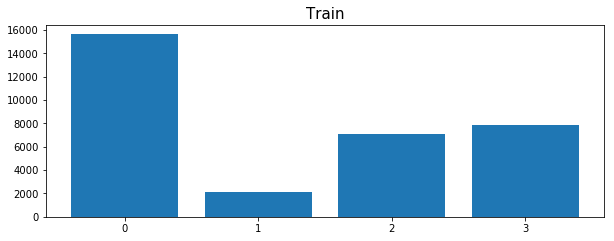

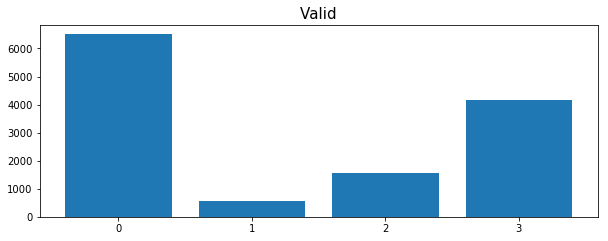

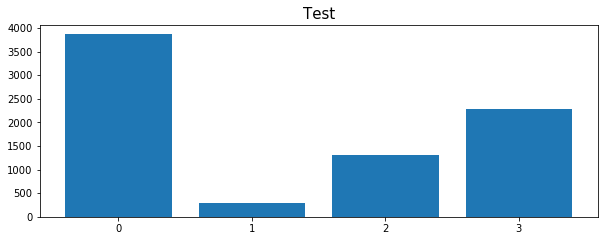

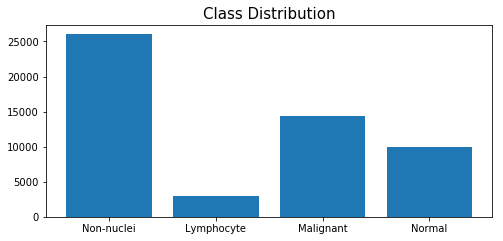

 Non-nuclei 26048
Lymphocyte 3034
Normal 9964
Malignant 14314
All nuclei 27312
Train is 

KeyError: 1

In [5]:
train_loc = '/Users/rb/Documents/waterloo/projects/cancer_hist/final/extracted_cells_192/train'
valid_loc = '/Users/rb/Documents/waterloo/projects/cancer_hist/final/extracted_cells_192/valid'
test_loc = '/Users/rb/Documents/waterloo/projects/cancer_hist/final/extracted_cells_192/test'
train_files = glob.glob(os.path.join(train_loc, '*'))
test_files = glob.glob(os.path.join(valid_loc, '*'))
valid_files = glob.glob(os.path.join(test_loc, '*'))

train_types = []
valid_types = []
test_types = []


for image_loc in train_files:
    train_types.append(int(image_loc.rsplit('/', 1)[-1].split('_', 1)[0]))
    
for image_loc in valid_files:
    valid_types.append(int(image_loc.rsplit('/', 1)[-1].split('_', 1)[0]))
    
for image_loc in test_files:
    test_types.append(int(image_loc.rsplit('/', 1)[-1].split('_', 1)[0]))
    
train_count = dict(Counter(train_types))
valid_count = dict(Counter(valid_types))
test_count = dict(Counter(test_types))

f = plt.figure(figsize=(10,12))
sp = f.add_subplot(3, 1, 1)
sp.set_title('Train', fontsize=15)
plt.bar(range(len(train_count)), train_count.values(), align='center')
plt.xticks(range(len(train_count)), train_count.keys())
plt.show()

f = plt.figure(figsize=(10,12))
sp = f.add_subplot(3, 1, 2)
sp.set_title('Valid', fontsize=15)
plt.bar(range(len(valid_count)), valid_count.values(), align='center')
plt.xticks(range(len(valid_count)), valid_count.keys())
plt.show()

f = plt.figure(figsize=(10,12))
sp = f.add_subplot(3, 1, 3)
sp.set_title('Test', fontsize=15)
plt.bar(range(len(test_count)), test_count.values(), align='center')
plt.xticks(range(len(test_count)), test_count.keys())
plt.show()

all_data={}
all_data['Non-nuclei'] = train_count.values()[0]+test_count.values()[0]+valid_count.values()[0]
all_data['Lymphocyte'] = train_count.values()[1]+test_count.values()[1]+valid_count.values()[1]
all_data['Normal'] = train_count.values()[2]+test_count.values()[2]+valid_count.values()[2]
all_data['Malignant'] = train_count.values()[3]+test_count.values()[3]+valid_count.values()[3]


labels=['Non-nuclei', 'Lymphocyte', 'Normal', 'Malignant']
f = plt.figure(figsize=(8,12))
sp = f.add_subplot(3, 1, 1)
sp.set_title('Class Distribution', fontsize=15)
plt.bar(range(len(all_data)), all_data.values(), align='center')
plt.xticks(range(len(all_data)), all_data.keys())
plt.show()

print 'Non-nuclei', all_data['Non-nuclei'] 
print 'Lymphocyte', all_data['Lymphocyte']  
print 'Normal', all_data['Normal']  
print 'Malignant', all_data['Malignant']  
print 'All nuclei', all_data['Lymphocyte'] + all_data['Normal'] + all_data['Malignant'] 




print "Train is ", round(all_data[1], 2)*100, "% lymphocyte"
print "Train is ", round(all_data[2], 2)*100, "% normal"
print "Train is ", round(all_data[3], 2)*100, "% malignant"

print all_data[1]+all_data[2]+all_data[3]


They look as expected, with the same class distributions between the train, test and validation sets.
It is quite imbalanced, with almost half being malignant

## Look at a few examples of each class

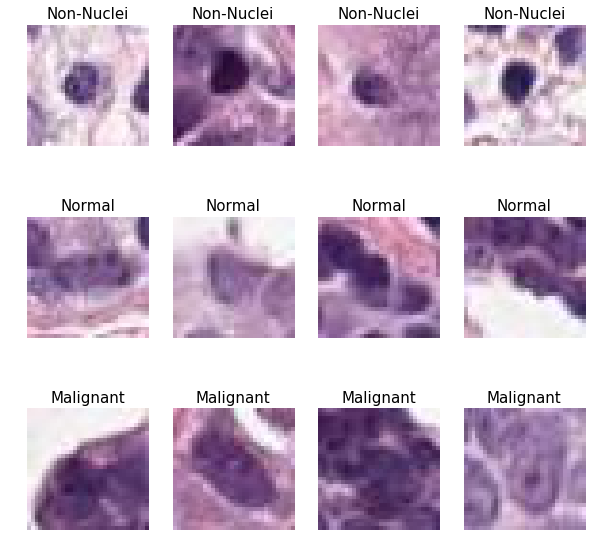

In [3]:
train_loc = '/Users/rb/Documents/waterloo/projects/cancer_hist/extracted_cells_4c/train'
train_files = glob.glob(os.path.join(train_loc, '*'))
num_imgs = 4

lymphocyte = np.random.choice([loc for loc in train_files if loc.rsplit('/', 1)[-1].split('_', 1)[0] == '1'], num_imgs)
normal = np.random.choice([loc for loc in train_files if loc.rsplit('/', 1)[-1].split('_', 1)[0] == '2'], num_imgs)
malignant = np.random.choice([loc for loc in train_files if loc.rsplit('/', 1)[-1].split('_', 1)[0] == '3'], num_imgs)

image_locs = np.concatenate([lymphocyte, normal, malignant])
names = np.concatenate([np.repeat(np.array('Non-Nuclei'), num_imgs),np.repeat(np.array('Normal'), num_imgs),np.repeat(np.array('Malignant'), num_imgs)])

f = plt.figure(figsize=(10, 10))
for i in range(len(image_locs)):
    sp = f.add_subplot(3, len(image_locs)//3, i+1)
    sp.axis('Off')
    sp.set_title(names[i].rsplit('/', 1)[-1], fontsize=15)
    image = np.array(Image.open(image_locs[i]))
    #plt.tight_layout()
    plt.imshow(image)

## Strange annotations
* It seems there were a lot of closely spaced labels in some images

In [50]:
import sys
sys.path.insert(0, '/Users/rb/Google_Drive/Waterloo/projects/cancer_hist/src')
from functions import*
import numpy as np
import glob
from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt
import pprint
% matplotlib inline

weird_list=[]

train_dir = '/Users/rb/Documents/waterloo/projects/cancer_hist/ExtractedNucleiROIs'
all_files=glob.glob(os.path.join(train_dir, '*'))
print 'len(all_files)', len(all_files)
all_xml = [loc for loc in all_files if 'key' in loc]
print 'len(all_xml)', len(all_xml)
all_min_dists = []
for xml_loc in all_xml:
    all_points = get_points_xml(xml_loc)
    point_list = all_points[:, 0:2]
    for index, point in enumerate(point_list):
        temp_point_list = np.delete(point_list, (index), axis=0) # don't match the point with itself
        dists = np.sqrt(np.sum((temp_point_list - point) ** 2, axis=1))
        min_ind = np.argmin(dists) 
        all_min_dists.append(dists[min_ind])
        if dists[min_ind]<4:
            weird_list.append(xml_loc) #.rsplit('/', 1)[-1])

print Counter(weird_list)
weird_list = list(set(weird_list))
print len(weird_list)

len(all_files) 462
len(all_xml) 154
Counter({'/Users/rb/Documents/waterloo/projects/cancer_hist/ExtractedNucleiROIs/24_Region 149_key.xml': 631, '/Users/rb/Documents/waterloo/projects/cancer_hist/ExtractedNucleiROIs/23_Region 144_key.xml': 279, '/Users/rb/Documents/waterloo/projects/cancer_hist/ExtractedNucleiROIs/60_Region 90_key.xml': 191, '/Users/rb/Documents/waterloo/projects/cancer_hist/ExtractedNucleiROIs/25_Region 152_key.xml': 49, '/Users/rb/Documents/waterloo/projects/cancer_hist/ExtractedNucleiROIs/26_Region 154_key.xml': 22, '/Users/rb/Documents/waterloo/projects/cancer_hist/ExtractedNucleiROIs/59_Region 86_key.xml': 19, '/Users/rb/Documents/waterloo/projects/cancer_hist/ExtractedNucleiROIs/62_Region 3_key.xml': 4, '/Users/rb/Documents/waterloo/projects/cancer_hist/ExtractedNucleiROIs/78_Region 4_key.xml': 2, '/Users/rb/Documents/waterloo/projects/cancer_hist/ExtractedNucleiROIs/36_Region 4_key.xml': 2, '/Users/rb/Documents/waterloo/projects/cancer_hist/ExtractedNucleiROIs/3

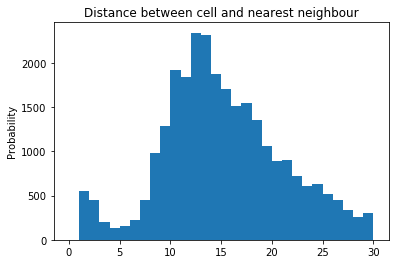

In [51]:
plt.hist(all_min_dists, bins=30, range=[0, 30], normed=False)
plt.title('Distance between cell and nearest neighbour')
plt.ylabel('Probability');

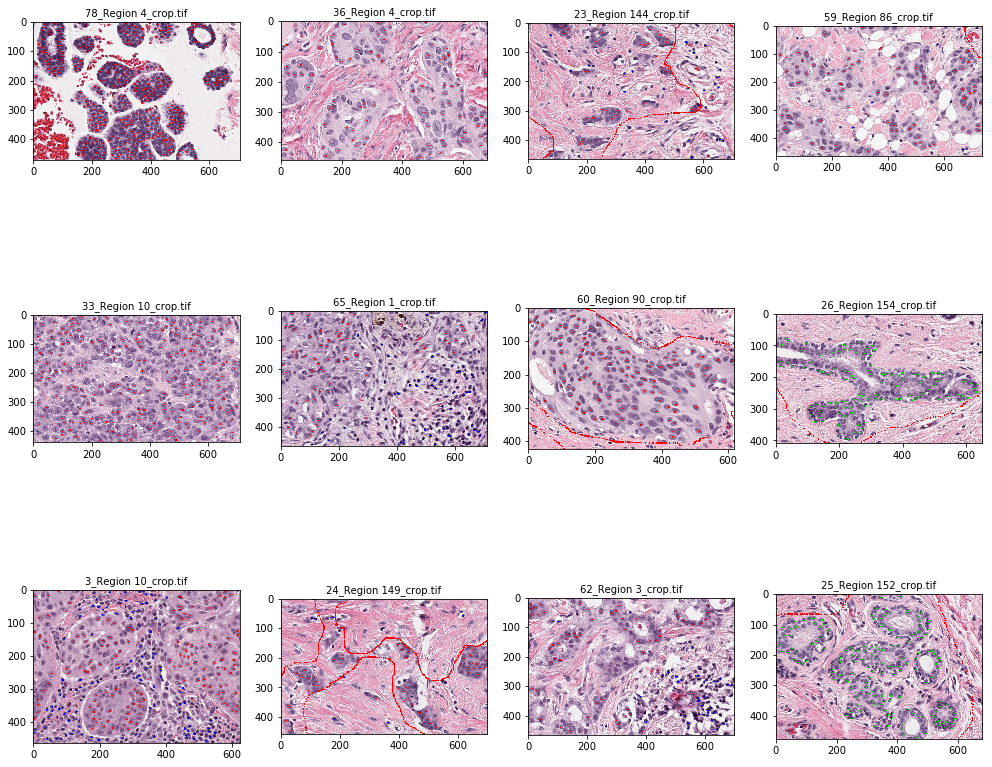

In [52]:
sys.path.insert(0, '/Users/rb/Google_Drive/Waterloo/projects/cancer_hist/src')
from functions import*

f = plt.figure(figsize=(17,15))

for i in range(0, len(weird_list)):
    xml_loc = weird_list[i]
    image_loc = xml_loc.replace('key.xml', 'crop.tif')
    all_points = get_points_xml(xml_loc)
    point_list = all_points[:, 0:2]
    
    image = Image.open(image_loc)
    image2 = np.asarray(image).astype(int)
    for row in range(len(all_points)):
        if all_points[row, 2] == 1:
            color = [0, 0, 255]
        elif all_points[row, 2] == 2:
            color = [0, 255, 0]  
        elif all_points[row, 2] == 3:
            color = [255, 0, 0]
        image2[int(all_points[row, 0])-2:int(all_points[row, 0])+2, int(all_points[row, 1])-2:int(all_points[row, 1])+2, :] = color

    sp = f.add_subplot(3, len(weird_list)//3, i+1)
    #sp.axis('Off')
    sp.set_title(image_loc.rsplit('/', 1)[-1], fontsize=10)
    #plt.tight_layout()
    plt.imshow(image2.astype(np.uint8))

Based on this it seems there are 6 badly mislabeled slides:
* 24_Region 149_key.xml: 631 
* 23_Region 144_key.xml: 279 
* 60_Region 90_key.xml:  191 
* 25_Region 152_key.xml: 49 
* 26_Region 154_key.xml: 22 
* 59_Region 86_key.xml:  19

The rest probably have some labelling issues, but are not bad enough to need to exclude them. 

## Useless attempt at T-SNE

In [234]:
train_loc = '/Users/rb/Documents/waterloo/projects/cancer_hist/classification_data/train'
train_files = glob.glob(os.path.join(train_loc, '*'))

image_locs = np.random.choice(train_files, 1000)
all_image_types = np.array([int(loc.rsplit('/', 1)[-1].split('_', 1)[0]) for loc in image_locs])
all_images = []

for i in range(len(image_locs)):
    image = np.array(Image.open(image_locs[i]).convert('1'))
#    image = (image)/255
    all_images.append(image)

print np.array(all_images).shape
all_images = np.reshape(np.array(all_images), (1000, -1))
print all_images.shape, all_image_types.shape
print np.count_nonzero(~np.isnan(all_images))

(1000, 32, 32)
(1000, 1024) (1000,)
1024000


[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.861785
[t-SNE] KL divergence after 100 iterations with early exaggeration: 24.592261
[t-SNE] Error after 475 iterations: 24.592261


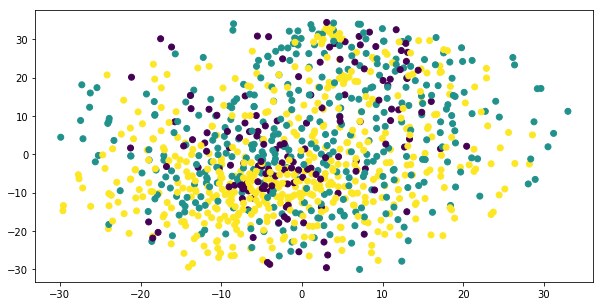

In [235]:
from sklearn.manifold import TSNE
tsne = TSNE(
    n_components=2,
    init='random', # pca
    random_state=1201,
    method='exact',
    n_iter=1000,
    verbose=1
).fit_transform(all_images)

figure(figsize=(10, 5))
scatter(tsne[:, 0], tsne[:, 1], c = all_image_types)

Clustering on raw pixel values doesn't work. Maybe based on the result of an autoencoder could be useful.